# Exercise 4

In [8]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

## Noise deduction

In [20]:
# Load dataset

christ = cv2.imread('images/christ/christ.jpg', 0)
noise0 = cv2.imread('images/christ/noise0.jpg', 0)
noise1 = cv2.imread('images/christ/noise1.jpg', 0)
noise2 = cv2.imread('images/christ/noise2.jpg', 0)
noise3 = cv2.imread('images/christ/noise3.jpg', 0)
noise4 = cv2.imread('images/christ/noise4.jpg', 0)
noise5 = cv2.imread('images/christ/noise5.jpg', 0)
noise6 = cv2.imread('images/christ/noise6.jpg', 0)

### Original image

Text(0.5, -0.1, 'Hist')

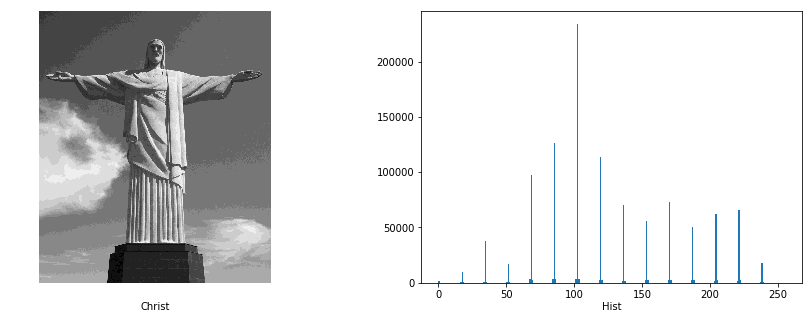

In [21]:
plt.figure(figsize=(15,5))
ax1 = plt.subplot(121)
ax1.imshow(christ, cmap='gray')
ax2 = plt.subplot(122)
ax2.hist(christ.flatten(), bins=255)

ax1.axis('off')

ax1.text(0.5,-0.1, "Christ", ha="center", transform=ax1.transAxes)
ax2.text(0.5,-0.1, "Hist", ha="center", transform=ax2.transAxes)

### Noise 0 - (Uniform)

Text(0.5, -0.1, 'Hist')

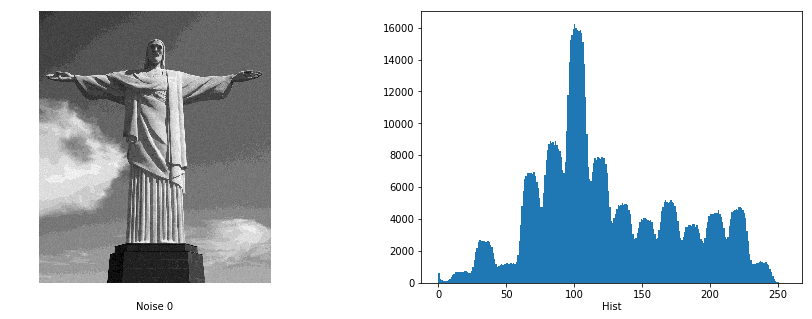

In [22]:
plt.figure(figsize=(15,5))
ax1 = plt.subplot(121)
ax1.imshow(noise0, cmap='gray')
ax2 = plt.subplot(122)
ax2.hist(noise0.flatten(), bins=255)

ax1.axis('off')

ax1.text(0.5,-0.1, "Noise 0", ha="center", transform=ax1.transAxes)
ax2.text(0.5,-0.1, "Hist", ha="center", transform=ax2.transAxes)

### Noise 1 - (Salt and Pepper)

Text(0.5, -0.1, 'Hist')

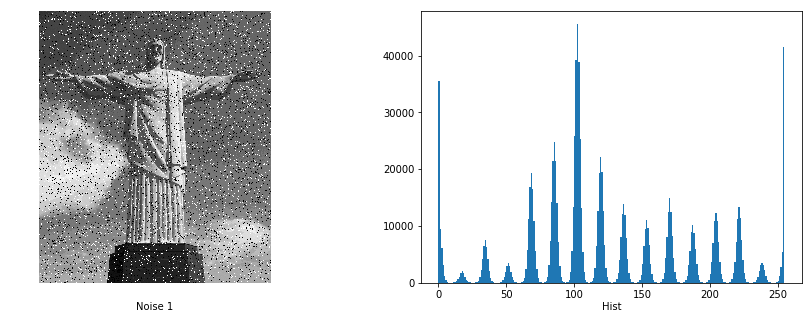

In [12]:
plt.figure(figsize=(15,5))
ax1 = plt.subplot(121)
ax1.imshow(noise1, cmap='gray')
ax2 = plt.subplot(122)
ax2.hist(noise1.flatten(), bins=255)

ax1.axis('off')

ax1.text(0.5,-0.1, "Noise 1", ha="center", transform=ax1.transAxes)
ax2.text(0.5,-0.1, "Hist", ha="center", transform=ax2.transAxes)

### Noise 2 - (Rayleigh)

Text(0.5, -0.1, 'Hist')

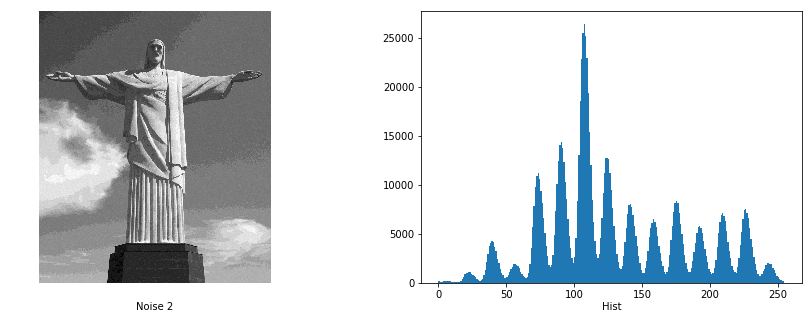

In [13]:
plt.figure(figsize=(15,5))
ax1 = plt.subplot(121)
ax1.imshow(noise2, cmap='gray')
ax2 = plt.subplot(122)
ax2.hist(noise2.flatten(), bins=255)

ax1.axis('off')

ax1.text(0.5,-0.1, "Noise 2", ha="center", transform=ax1.transAxes)
ax2.text(0.5,-0.1, "Hist", ha="center", transform=ax2.transAxes)

### Noise 3 - (Salt)¶

Text(0.5, -0.1, 'Hist')

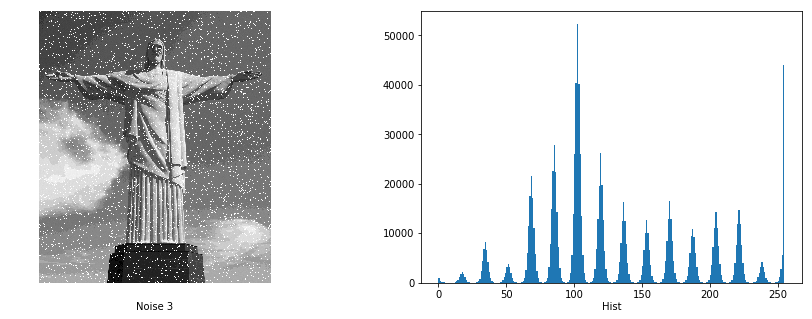

In [14]:
plt.figure(figsize=(15,5))
ax1 = plt.subplot(121)
ax1.imshow(noise3, cmap='gray')
ax2 = plt.subplot(122)
ax2.hist(noise3.flatten(), bins=255)

ax1.axis('off')

ax1.text(0.5,-0.1, "Noise 3", ha="center", transform=ax1.transAxes)
ax2.text(0.5,-0.1, "Hist", ha="center", transform=ax2.transAxes)

### Noise 4 - (Salt and Pepper)¶

Text(0.5, -0.1, 'Hist')

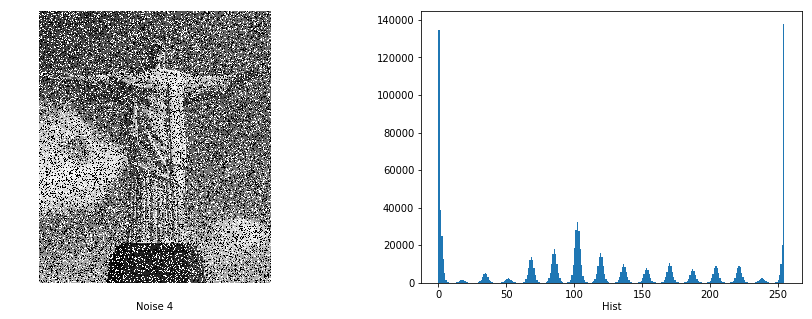

In [15]:
plt.figure(figsize=(15,5))
ax1 = plt.subplot(121)
ax1.imshow(noise4, cmap='gray')
ax2 = plt.subplot(122)
ax2.hist(noise4.flatten(), bins=255)

ax1.axis('off')

ax1.text(0.5,-0.1, "Noise 4", ha="center", transform=ax1.transAxes)
ax2.text(0.5,-0.1, "Hist", ha="center", transform=ax2.transAxes)

### Noise 5 - (Pepper)¶

Text(0.5, -0.1, 'Hist')

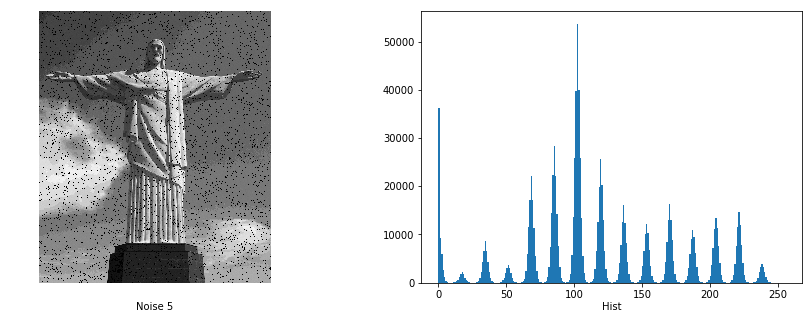

In [16]:
plt.figure(figsize=(15,5))
ax1 = plt.subplot(121)
ax1.imshow(noise5, cmap='gray')
ax2 = plt.subplot(122)
ax2.hist(noise5.flatten(), bins=255)

ax1.axis('off')

ax1.text(0.5,-0.1, "Noise 5", ha="center", transform=ax1.transAxes)
ax2.text(0.5,-0.1, "Hist", ha="center", transform=ax2.transAxes)

### Noise 6 - (Gaussian)¶

Text(0.5, -0.1, 'Hist')

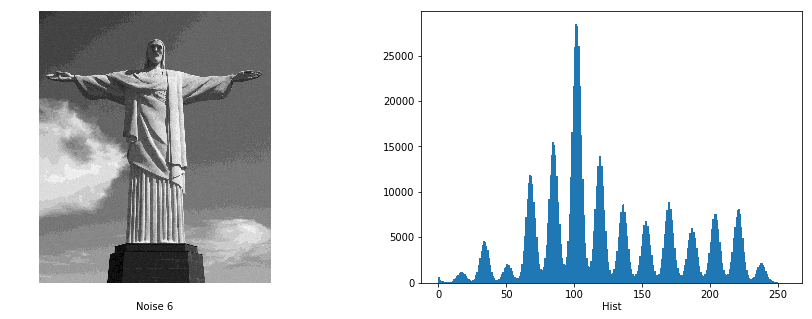

In [17]:
plt.figure(figsize=(15,5))
ax1 = plt.subplot(121)
ax1.imshow(noise6, cmap='gray')
ax2 = plt.subplot(122)
ax2.hist(noise6.flatten(), bins=255)

ax1.axis('off')

ax1.text(0.5,-0.1, "Noise 6", ha="center", transform=ax1.transAxes)
ax2.text(0.5,-0.1, "Hist", ha="center", transform=ax2.transAxes)

## Image correction

In [23]:
# Load dataset

ibirapuera = cv2.imread('images/ibirapuera/ibirapuera.jpg', 0)
ruidoGaussiano = cv2.imread('images/ibirapuera/ruidoGaussiano.jpg', 0)
ruidoGaussianoSalPimenta = cv2.imread('images/ibirapuera/ruidoGaussianoSalPimenta.jpg', 0)
ruidoPimenta = cv2.imread('images/ibirapuera/ruidoPimenta.jpg', 0)
ruidoSal = cv2.imread('images/ibirapuera/ruidoSal.jpg', 0)
ruidoSalPimenta = cv2.imread('images/ibirapuera/ruidoSalPimenta.jpg', 0)

### Filters implementation

In [50]:
def geometric(img, sizew, sizeh):
    kh,kw = sizeh, sizew
    h,w = img.shape    
    rh = kh // 2
    rw = kw // 2
    
    border = cv2.copyMakeBorder(img, rh, rh, rw, rw, cv2.BORDER_DEFAULT)
    result = img.copy()
        
    for row in range(h):
        for col in range(w):
            result[row,col] = np.prod( border[row:row+rh,col:col+rw] ) ** ( 1 / (rw*rh) )
    
    return result.astype('uint8')
    

[[218 222 218 ... 105  78 110]
 [228 218 228 ... 105  70 104]
 [218 222 218 ... 105  78 110]
 ...
 [158 149 158 ... 171 174 175]
 [159 164 159 ... 190 181 178]
 [183 183 183 ... 183 177 181]]
255 0



Text(0.5, -0.1, 'Geometric')

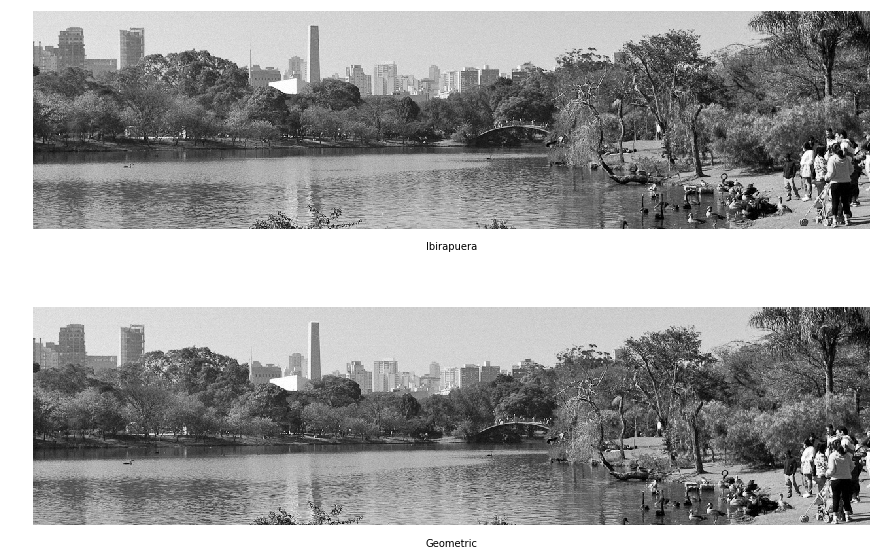

In [51]:
result = geometric(ruidoGaussiano, 3, 3)
print(result)
print(result.max(), result.min())
print()

plt.figure(figsize=(15,10))
ax1 = plt.subplot(211)
ax1.imshow(ruidoGaussiano, cmap='gray')
ax2 = plt.subplot(212)
ax2.imshow(result, cmap='gray')

ax1.axis('off')
ax2.axis('off')

ax1.text(0.5,-0.1, "Ibirapuera", ha="center", transform=ax1.transAxes)
ax2.text(0.5,-0.1, "Geometric", ha="center", transform=ax2.transAxes)